In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_connection, new_zillow_data, get_zillow_data 

In [2]:
df = get_zillow_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41354 entries, 0 to 41353
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      41354 non-null  int64  
 1   propertylandusetypeid         41354 non-null  float64
 2   propertylandusedesc           41354 non-null  object 
 3   transactiondate               41354 non-null  object 
 4   calculatedfinishedsquarefeet  41238 non-null  float64
 5   bedroomcnt                    41354 non-null  float64
 6   bathroomcnt                   41354 non-null  float64
 7   buildingqualitytypeid         26158 non-null  float64
 8   fips                          41354 non-null  float64
 9   regionidzip                   41327 non-null  float64
 10  yearbuilt                     41195 non-null  float64
 11  taxvaluedollarcnt             41353 non-null  float64
 12  assessmentyear                41354 non-null  float64
 13  t

In [18]:
# the project calls for single units on, rows will needs to be dropped that feature land use descriptions that !=

df.propertylandusedesc.value_counts()

Single Family Residential                     28125
Condominium                                   10211
Planned Unit Development                       1046
Duplex (2 Units, Any Combination)              1023
Quadruplex (4 Units, Any Combination)           375
Triplex (3 Units, Any Combination)              268
Cluster Home                                    186
Manufactured, Modular, Prefabricated Homes       40
Mobile Home                                      34
Residential General                              24
Cooperative                                      12
Commercial/Office/Residential Mixed Used          7
Townhouse                                         3
Name: propertylandusedesc, dtype: int64

In [22]:
df.loc[df['calculatedfinishedsquarefeet'] == 1200].head()

,parcelid,propertylandusetypeid,propertylandusedesc,transactiondate,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,buildingqualitytypeid,fips,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,taxamount
680,17275813,266.0,Condominium,2017-05-05,1200.0,3.0,2.5,NaN,6111.0,96385.0,1985.0,300303.0,2016.0,3221.22
2530,14075184,261.0,Single Family Residential,2017-05-22,1200.0,2.0,1.5,NaN,6059.0,97008.0,1966.0,459000.0,2016.0,5225.18
2571,14603899,266.0,Condominium,2017-05-22,1200.0,2.0,1.5,NaN,6059.0,97039.0,1979.0,174003.0,2016.0,2151.46
2842,14273115,261.0,Single Family Residential,2017-05-24,1200.0,3.0,2.0,NaN,6059.0,96959.0,1957.0,54231.0,2016.0,1222.98
3283,17138312,261.0,Single Family Residential,2017-05-26,1200.0,3.0,2.0,NaN,6111.0,97089.0,1972.0,502000.0,2016.0,5419.74


In [23]:
# locate the 16 NaNs for the FIPS, we should drop these in the prep section.

df.loc[df['fips'].isin(['NaN'])]

,parcelid,propertylandusetypeid,propertylandusedesc,transactiondate,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,buildingqualitytypeid,fips,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,taxamount


In [24]:
# get the index number so these rows can be dropped

indexFips = df.loc[df['fips'].isin(['NaN'])].index

In [25]:
# Delete these row indexes from dataFrame

df.drop(indexFips , inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41354 entries, 0 to 41353
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      41354 non-null  int64  
 1   propertylandusetypeid         41354 non-null  float64
 2   propertylandusedesc           41354 non-null  object 
 3   transactiondate               41354 non-null  object 
 4   calculatedfinishedsquarefeet  41238 non-null  float64
 5   bedroomcnt                    41354 non-null  float64
 6   bathroomcnt                   41354 non-null  float64
 7   buildingqualitytypeid         26158 non-null  float64
 8   fips                          41354 non-null  float64
 9   regionidzip                   41327 non-null  float64
 10  yearbuilt                     41195 non-null  float64
 11  taxvaluedollarcnt             41353 non-null  float64
 12  assessmentyear                41354 non-null  float64
 13  t

In [27]:
# locate the NaNs for the finished sqft, we should drop these in the prep section.

df.loc[df['calculatedfinishedsquarefeet'].isin(['NaN'])]

,parcelid,propertylandusetypeid,propertylandusedesc,transactiondate,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,buildingqualitytypeid,fips,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,taxamount
16,14430658,261.0,Single Family Residential,2017-08-25,NaN,0.0,0.0,NaN,6059.0,96961.0,NaN,5346951.0,2016.0,82484.04
20,11999890,260.0,Residential General,2017-06-08,NaN,0.0,0.0,NaN,6037.0,96029.0,NaN,2578702.0,2016.0,30456.40
172,14466991,261.0,Single Family Residential,2017-05-01,NaN,0.0,0.0,NaN,6059.0,96989.0,NaN,2493444.0,2016.0,25740.28
479,13972530,261.0,Single Family Residential,2017-05-04,NaN,0.0,0.0,NaN,6059.0,97004.0,NaN,270009.0,2016.0,3230.88
480,14325627,261.0,Single Family Residential,2017-05-04,NaN,0.0,0.0,NaN,6059.0,96975.0,NaN,7074075.0,2016.0,81640.56
486,12686981,261.0,Single Family Residential,2017-05-04,NaN,0.0,0.0,NaN,6037.0,96121.0,NaN,5461875.0,2016.0,60905.26
585,11637994,266.0,Condominium,2017-05-05,NaN,0.0,0.0,NaN,6037.0,96086.0,NaN,253812.0,2016.0,2955.67
899,10746614,263.0,Mobile Home,2017-05-08,NaN,0.0,0.0,NaN,6037.0,96384.0,NaN,230876.0,2016.0,2842.21
1053,14620727,266.0,Condominium,2017-05-09,NaN,0.0,0.0,NaN,6059.0,96974.0,NaN,270460.0,2016.0,2721.46
1273,12508965,248.0,"Quadruplex (4 Units, Any Combination)",2017-05-10,NaN,0.0,0.0,NaN,6037.0,96234.0,NaN,452572.0,2016.0,6175.78


In [28]:
# Find the index numbers to drop these since sqsft, bed, bath, and year built are all NaN

indexCFSQFT = df.loc[df['calculatedfinishedsquarefeet'].isin(['NaN'])].index


# Delete these row indexes from dataFrame

df.drop(indexCFSQFT , inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41238 entries, 0 to 41353
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      41238 non-null  int64  
 1   propertylandusetypeid         41238 non-null  float64
 2   propertylandusedesc           41238 non-null  object 
 3   transactiondate               41238 non-null  object 
 4   calculatedfinishedsquarefeet  41238 non-null  float64
 5   bedroomcnt                    41238 non-null  float64
 6   bathroomcnt                   41238 non-null  float64
 7   buildingqualitytypeid         26156 non-null  float64
 8   fips                          41238 non-null  float64
 9   regionidzip                   41213 non-null  float64
 10  yearbuilt                     41190 non-null  float64
 11  taxvaluedollarcnt             41237 non-null  float64
 12  assessmentyear                41238 non-null  float64
 13  t

<AxesSubplot:>

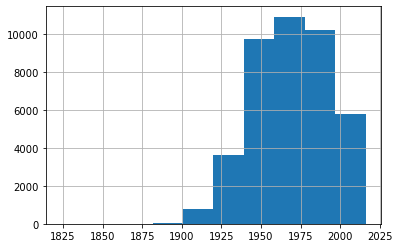

In [30]:
df.yearbuilt.hist()